<a href="https://www.kaggle.com/code/norqui/weather-logisticregression-randomforest?scriptVersionId=236715219" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.display import HTML
import time



# Weather Forecating using Logistic Regression and Decision Tree Classification


### 1) Introduction
The Weather Forecasting dataset at [Kaggle](  https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset/data) consists of 2500 observations with five weather conditions: Temperature, Humidity, Wind Speed, Cloud Cover and Pressure. 

The goal of this project is to apply Logistic Regression to this dataset to predict rainfall based on the given weather conditions. I also apply Decision Tree for classification. 


## 2) Importing libraries

In [2]:
# Basic modules
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d  import Axes3D
import seaborn as sns


# library from preprocessing Module.
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,  recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,roc_auc_score, roc_curve, auc

# DecisionTree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree


# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import warnings
warnings.filterwarnings('ignore')

##  3) Exploring Data

### a) Loading Data

In [3]:
# Load data 
df = pd.read_csv("/kaggle/input/weather-forecast-dataset/weather_forecast_data.csv")

###  b) General Information

In [4]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [6]:
# Check duplicated rows
df[df.duplicated()]



,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain


* The dataset consists of 2500 arrows and 6 attributes: *Temperature*, *Humidty*, *Wind_Speed*, *Cloud_Cover*, *Pressure*  and *Rain*.
* The attribute  *Rain* is categorical and contains two classes, 0 (no rain) and 1 (rain).
* The rest of the attributes are numerical variables type float. 
* There are no missing values in this dataset as can be seen from the Non-Null Count column.
* There are no duplicates.
  

In [7]:
# Relevant Statistical information
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


The numerical variables have different order of magnitud, for instance,  *Pressure* is two order of magnitud than *Temperature*.

Next, the distribution of attribute values in each *Rain* class.

In [8]:
# Range of values of attributes  grouped by Rain for the weather condition variables

extremes=df.groupby("Rain").agg(["min", "max"]) 
extremes

Temperature              Humidity            Wind_Speed             \
                min        max        min        max        min        max   
Rain                                                                         
no rain   10.001842  34.995214  30.005071  99.997481   0.009819  19.999132   
rain      10.016605  24.822007  70.094641  99.995180   0.033690  19.989565   

        Cloud_Cover               Pressure               
                min        max         min          max  
Rain                                                     
no rain    0.015038  99.997795  980.014486  1049.985593  
rain      50.073046  99.672015  980.108934  1049.907858

* The features  *Pressure* and  *Wind_Speed*  have almost the same range of values  along the two classes.
*  *Humidity*, *Cloud_Cover*, and *Temperature* take different range of values in each class. For instance,  there is rain if  *Humidity* is above 70, otherwise there is no rain. If *Cloud Cover* is above 50 we have rain otherwise, there is no rain.  This can be visualized in the following scatter plot. 

### c) Visualization 

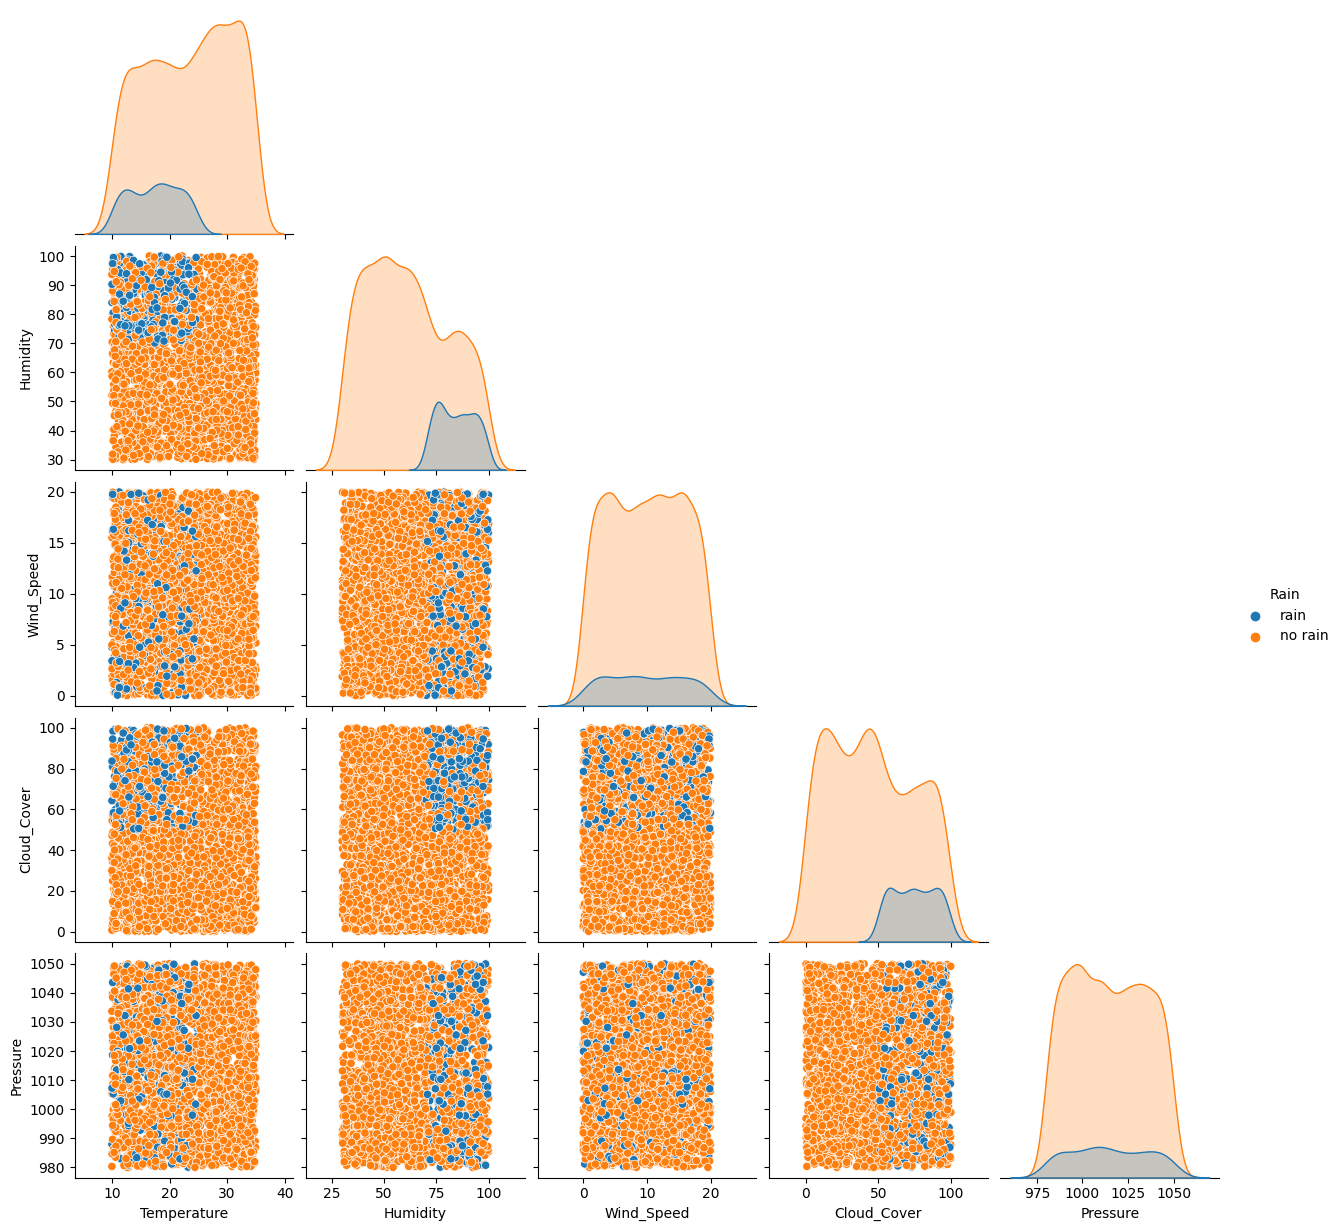

In [9]:
# Distribution of the attribute values for each class
sns.pairplot(df, hue="Rain", corner=True)

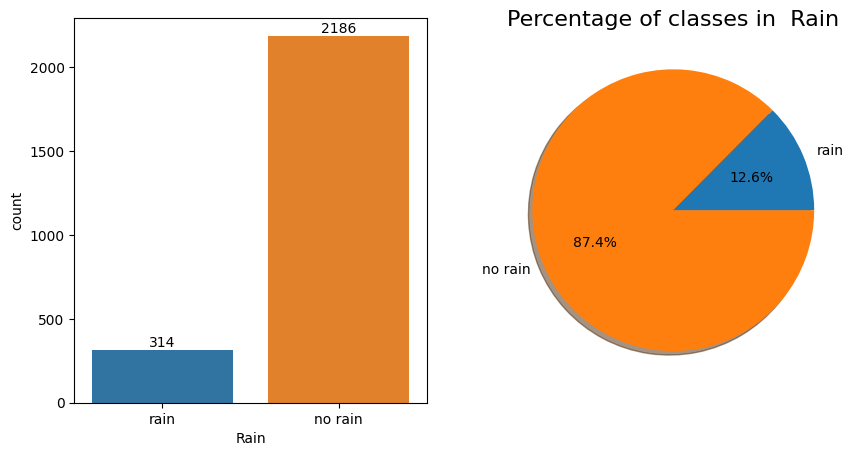

In [10]:
# Counting the number of classes in Rain 
rain_df = pd.Categorical(df['Rain'],categories=['rain','no rain'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
# bar plot
ax = sns.countplot(data=df, x="Rain",ax=ax[0])
ax.bar_label(ax.containers[0])        
#pie plot 
rain_df.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}, ylabel='') 
plt.title('Percentage of classes in  Rain', fontsize=16)
plt.show()

As shown above, 87% of the data are classified as no rain and 13% as rain. According to the percentage of the minority class,  this is  a moderately imbalanced dataset.

### d) Outliers

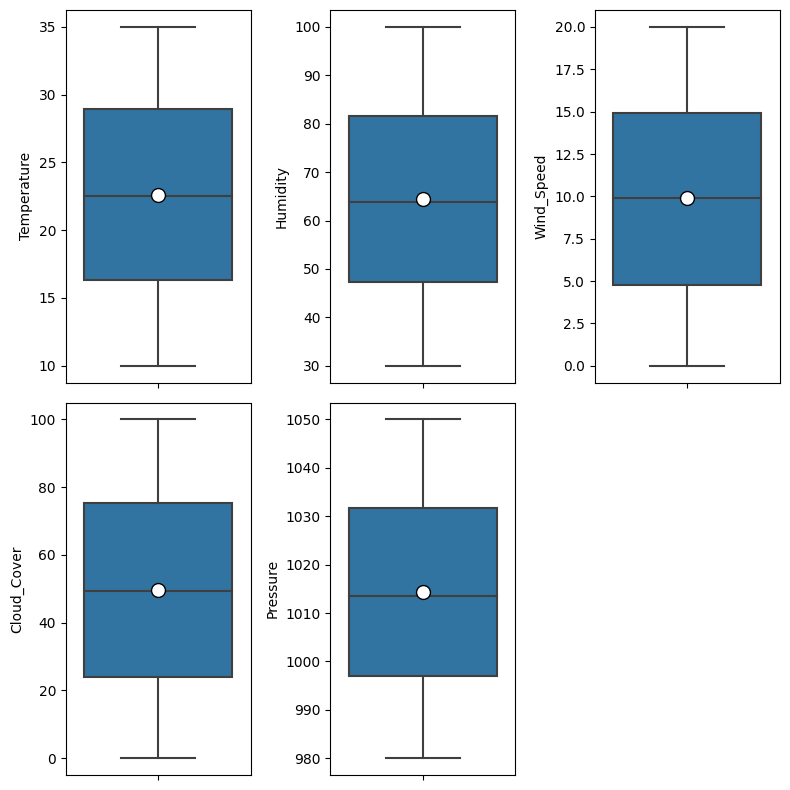

In [11]:
plt.figure(figsize=(8,8))
features = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"] 
for i,col in enumerate(features):
    plt.subplot(2,3,i + 1)
    sns.boxplot(y=col, data=df,showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
    #plt.ylabel('')

plt.tight_layout()
plt.show()

According to these boxplots:
* There are no outliers
* Not all the numerical variables have the same order of magnitude.

### e) Correlation matrix

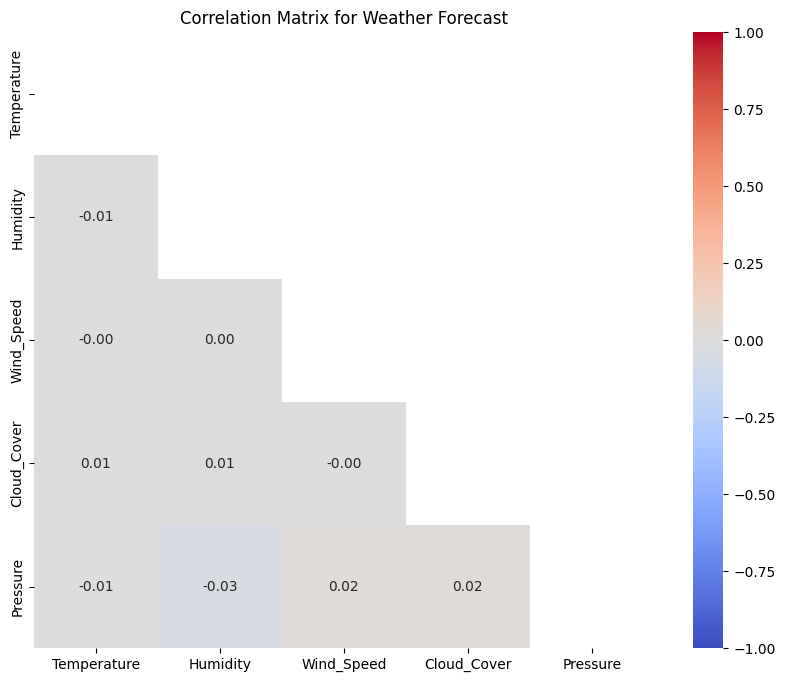

In [12]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(corr, dtype=bool))
# Using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",mask = mask,vmin=-1, vmax=1,)
plt.title('Correlation Matrix for Weather Forecast')
plt.show()

There is no correlation between the numerical variables.

##  4) Preprocesing data

In [13]:
# Convert categorical feature Rain  to numerical

label_encoder = LabelEncoder()
df["Rain"] = label_encoder.fit_transform(df["Rain"])
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [14]:
# Get the label mappings from label encoder
integer_mapping = {l: i for i, l in enumerate(label_encoder.classes_)}
print(integer_mapping)

{'no rain': 0, 'rain': 1}


In [15]:
# Define features and target
X = df.drop('Rain', axis=1)  # Feature variables
y = df['Rain']  # Target variable


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train lenght:", X_train.shape)
print("X_test lenght:",X_test.shape)

X_train lenght: (2000, 5)
X_test lenght: (500, 5)


In [17]:
# Standarize numerical features
# define the scaler
scaler = preprocessing.StandardScaler()
# fit on the training data
scaler.fit(X_train)
# scale on training dataset
X_train = scaler.transform(X_train)
#scale on the test dataset
X_test = scaler.transform(X_test)

## 5) Logistic Regression 



## a) Standard Logistic Regression (no class_weight)

In [18]:
def plot_log(X_values, train_values, test_values, Xlabel, ylabel, title):
    plt.semilogx(X_values, train_values, X_values, test_values)
    plt.xlabel(Xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(("Train", "Test"))
    plt.grid()
    plt.show()

In [19]:
# Standard logistic regression with regularization

# list to record the accuracy
training_accuracy = []
testing_accuracy = []

# list to record the error
training_error = []
testing_error = []

# C Hyperparameter
C_param = np.linspace(0.001, 100, 100)

for C_value in C_param:
    #Logistic Regression
    lr = LogisticRegression(C=C_value,penalty= "l2")
    lr.fit(X_train, y_train)

    #Appending the Accuracy Score
    training_accuracy.append(lr.score(X_train, y_train))
    testing_accuracy.append(lr.score(X_test, y_test))

    #Appending the Error Score
    training_error.append(1-lr.score(X_train, y_train))
    testing_error.append(1-lr.score(X_test, y_test))

# Give the best parameter
best_C = C_param[np.argmax(training_accuracy)]

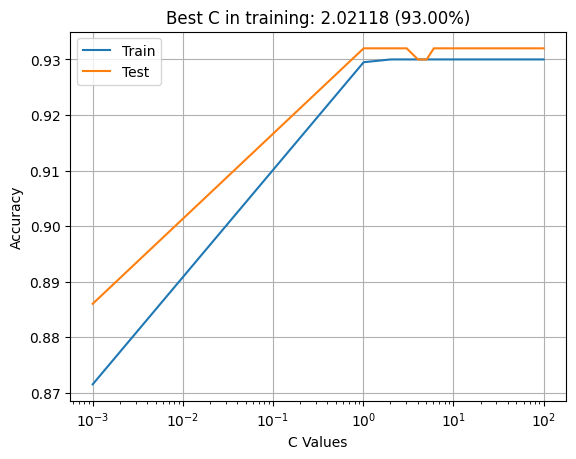

In [20]:
# Plot accuracy vs C
plot_log(C_param, training_accuracy, testing_accuracy, "C Values", "Accuracy", title=f"Best C in training: {best_C:1g} ({np.max(training_accuracy):.2%})")

In [21]:
# Initialize and train the logistic regression model
# choose the model
LR = LogisticRegression(C=best_C,penalty= "l2")
# fit the model with training sets
LR.fit(X_train, y_train)


# Predicting the values for training  and test set
prediction_y_train = LR.predict(X_train) # predict with the X_train
prediction_y_test = LR.predict(X_test)  # predict with X_test

# Evaluate the model
accuracy_training = accuracy_score(y_train, prediction_y_train)
print(f"Accuracy on training: {accuracy_training:.4f}")

accuracy_test = accuracy_score(y_test, prediction_y_test)
print(f"Accuracy on test: {accuracy_test:.4f}")


Accuracy on training: 0.9300
Accuracy on test: 0.9320


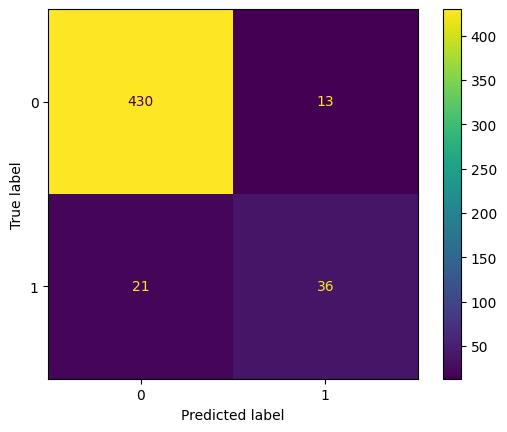

In [22]:
# Evaluation of the Regression  Model 

# Visualize the confussion matriz
cm_st = confusion_matrix(y_test, prediction_y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_st,
                              display_labels=LR.classes_)
disp.plot()
plt.show()

In [23]:
# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm_st.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 36
True Negatives (TN): 430
False Positives (FP): 13
False Negatives (FN): 21


In [24]:
st_classification = classification_report(y_test, prediction_y_test)
print(st_classification)

# Area under ROC curve
rocauc_st = roc_auc_score(y_test,prediction_y_test)
print(f'Area Under the ROC AUC Curve for Standard Logistic Regression: {rocauc_st:.2f}')


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       443
           1       0.73      0.63      0.68        57

    accuracy                           0.93       500
   macro avg       0.84      0.80      0.82       500
weighted avg       0.93      0.93      0.93       500

Area Under the ROC AUC Curve for Standard Logistic Regression: 0.80


In [25]:
# Evaluation with Cross Validation
from sklearn.model_selection import StratifiedKFold
cross_val = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(LR, X_train, y_train, scoring='accuracy', cv=cross_val, n_jobs=-1)

for index, score in enumerate(scores):
    print('Iteration {} Accuracy score: {}'.format(index + 1, score))
    
print('\nMean Accuracy: {}'.format(np.mean(scores)))

Iteration 1 Accuracy score: 0.91
Iteration 2 Accuracy score: 0.945
Iteration 3 Accuracy score: 0.905
Iteration 4 Accuracy score: 0.94
Iteration 5 Accuracy score: 0.935
Iteration 6 Accuracy score: 0.95
Iteration 7 Accuracy score: 0.895
Iteration 8 Accuracy score: 0.935
Iteration 9 Accuracy score: 0.94
Iteration 10 Accuracy score: 0.93

Mean Accuracy: 0.9285


The accuracy for the training set of the standard logistic model is 0.93 which seems to be good but one has to consider that the dataset is a little imbalanced. This value agrees with the accuracy mean (0.93) obtained with Cross validation.

In the context of weather, FN is more costly than FP because predicting no rain when it is going to rain can be dangerous or put people at risk according to the intensity of the rainfall. Then, a better metric to evaluate the model is recall. The positive class 1 (rain) has recall of 0.65 which is moderate compared to 0.97 for the negative class 0 (no rain). It seems that the model is biased due to the imbalance of the target Rain. Also, the area under the ROC curve is 0.8 indicating that the predictions with this model are of moderate quality.


In [26]:
LR.intercept_


array([-5.23587255])

In [27]:
# Get the coefficients associated to features
pd.DataFrame(data=LR.coef_,columns=X.columns)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,-1.998352,2.645161,0.020154,2.377006,-0.031


with this Standard Logistic Regression, *Humidity*, *Cloud_Cover* and *Temperare* are the variables that most contribute to the model. 

## b) Weighted Logistic Regression

As a curiosity, I perform  Weighted Logistic Regression and compare results with the Standard Logistic Regression. I choose class weight = balanced.

In [28]:
# Weighted  logistic regression with regularization

# list to record the accuracy
wt_training_accuracy = []
wt_testing_accuracy = []

# list to record the error
wt_training_error = []
wt_testing_error = []

# C Hyperparameter
C_param = np.linspace(0.001, 100, 100)

for C_value in C_param:
    #Logistic Regression
    lr_wt = LogisticRegression(C=C_value,penalty= "l2", solver="liblinear",random_state=42, class_weight= "balanced" ,max_iter=1000)
    lr_wt.fit(X_train, y_train)

    #Appending the Accuracy Score
    wt_training_accuracy.append(lr_wt.score(X_train, y_train))
    wt_testing_accuracy.append(lr_wt.score(X_test, y_test))

    #Appending the Error Score
    wt_training_error.append(1-lr_wt.score(X_train, y_train))
    wt_testing_error.append(1-lr_wt.score(X_test, y_test))

best_C_wt = C_param[np.argmax(wt_training_accuracy)]

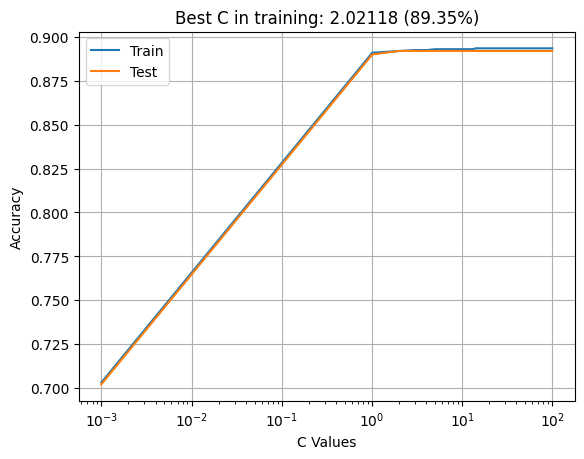

In [29]:
plot_log(C_param, wt_training_accuracy, wt_testing_accuracy, "C Values", "Accuracy", title=f"Best C in training: {best_C:1g} ({np.max(wt_training_accuracy):.2%})")

In [30]:
# Weighted Logistic Regression model
LR_wt = LogisticRegression(C = best_C_wt,penalty= "l2", solver="liblinear",random_state=42, class_weight= "balanced" ,max_iter=1000)
# fit it
LR_wt.fit(X_train,y_train)


# Predicting the values for training and testing sets
prediction_y_train_wt = LR_wt.predict(X_train)
prediction_y_test_wt = LR_wt.predict(X_test)

# Evaluate the model
accuracy_training_wt = accuracy_score(y_train, prediction_y_train_wt)
print(f"Accuracy on training: {accuracy_training_wt:.4f}")

accuracy_test_wt = accuracy_score(y_test, prediction_y_test_wt)
print(f"Accuracy on test: {accuracy_test_wt:.4f}")


Accuracy on training: 0.8935
Accuracy on test: 0.8920


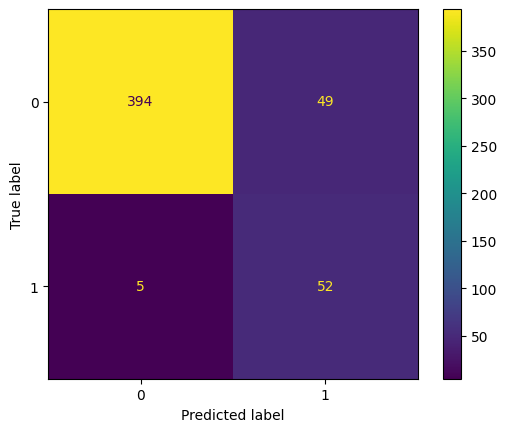

In [31]:
#Evaluation of the model 

# Confussion matrix
cm_wt = confusion_matrix(y_test, prediction_y_test_wt)
cm_wt
# Visualize the confussion matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_wt,
                              display_labels=LR_wt.classes_)
disp.plot()
plt.show()

In [32]:
# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm_wt.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 52
True Negatives (TN): 394
False Positives (FP): 49
False Negatives (FN): 5


In [33]:
wt_classification = classification_report(y_test, prediction_y_test_wt)
print(wt_classification)

# Area under ROC curve
rocauc_wt = roc_auc_score(y_test, prediction_y_test_wt)
print(f'Area Under the ROC AUC Curve for Standard Logistic Regression: {rocauc_wt:.2f}')


              precision    recall  f1-score   support

           0       0.99      0.89      0.94       443
           1       0.51      0.91      0.66        57

    accuracy                           0.89       500
   macro avg       0.75      0.90      0.80       500
weighted avg       0.93      0.89      0.90       500

Area Under the ROC AUC Curve for Standard Logistic Regression: 0.90


In [34]:
# Evaluation with Cross Validation
from sklearn.model_selection import StratifiedKFold
cross_val = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(LR_wt, X_train, y_train, scoring='accuracy', cv=cross_val, n_jobs=-1)

for index, score in enumerate(scores):
    print('Iteration {} Accuracy score: {}'.format(index + 1, score))
    
print('\nMean Accuracy weighted : {}'.format(np.mean(scores)))

Iteration 1 Accuracy score: 0.875
Iteration 2 Accuracy score: 0.9
Iteration 3 Accuracy score: 0.875
Iteration 4 Accuracy score: 0.91
Iteration 5 Accuracy score: 0.885
Iteration 6 Accuracy score: 0.91
Iteration 7 Accuracy score: 0.885
Iteration 8 Accuracy score: 0.88
Iteration 9 Accuracy score: 0.92
Iteration 10 Accuracy score: 0.895

Mean Accuracy weighted : 0.8935000000000001


In the balanced Weighted Logistic Regression case, the accuracy for training  is low compared to the accuracy in the Standard Regression Model. It is 0.89 and this value agrees with the mean obtained with Cross Validation. However, the balaced weighted class has reduced the number of FN and  has increased the TP and the FP which are less costly for weather prediction. Also, the values of recall are very acceptable and are balanced between the two classes, although precision is worse. In addition, this model improves the area under the ROC curve. Therefore, this model seems to be better than the Standard Logistic Regression model.


In [35]:
# Understanding the model
# Coefficients of the weighted LR
coefficient_wt= LR_wt.coef_
intercept_wt= LR_wt.intercept_
coeff_wt= coefficient_wt[0]
print("LR_wt coefficient:", np.round(coeff_wt,2),"\n", "LR_wt intercept:", np.round(intercept_wt,2) )


LR_wt coefficient: [-2.1   3.01  0.06  2.65 -0.02] 
 LR_wt intercept: [-3.76]


In [36]:
# Get the coefficients associated to features
pd.DataFrame(data=LR_wt.coef_,columns=X.columns)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,-2.102817,3.011339,0.061277,2.649962,-0.024458


The Weighted Logistic Regression model is given by the function


$$
P(y_i=1|X_i) = \frac{1}{1 + e^{3.76 +2.1 \,T - 3.01\, H - 0.06\, WS - 2.65 \, CC + 0.02 \,P}}
$$
with
* $T$ the temperature
* $H$ the Humidity
* $WS$ the Wind_Speed
* $CC$ the Cloud_Cover
* $P$ the pressure

Compared with the Standard case, the magnitude of the coefficients grew up with the weighted LR. In both cases, Humidity (H), Cloud Cover (CC) and Temperature (T) are  the most influential variables in this model with Humitity  (H) contributing most, followed by Cloud Cover (CC). Temperature operates in opposite direction to H and CC.  The contribution of  Wind Speed (WS) and Pressure(P) is  minimal. 
 

In [37]:
# Probability 
prob_rain = pd.DataFrame(LR_wt.predict_proba(X_test), columns=['P(y=0|X)', 'P(y=1|X)'])
prob_rain.head()


,P(y=0|X),P(y=1|X)
0,0.999996,0.000004
1,0.995339,0.004661
2,0.954449,0.045551
3,0.055356,0.944644
4,0.999956,0.000044


## 6) Decision Tree

In the following I will apply Decision Tree and Random Forest algorithms to the dataset. Normalization is not needed in these cases. Therefore, I split the unnormalized data set as follows:

In [38]:
# Split dataset into training and test
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# compute the mean absolute error (MAE) of the model
def get_mae(max_leaf_nodes,X_trainset, X_testset, y_trainset, y_testset ):
    model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=max_leaf_nodes, max_depth = 6,random_state=42)
    model.fit(X_trainset, y_trainset)
    preds_val = model.predict(X_testset)
    mae = mean_absolute_error(y_testset, preds_val)
    return(mae)

In [40]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in range(2,10,1):
    mae = get_mae(max_leaf_nodes,X_trainset, X_testset, y_trainset, y_testset )
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae))

Max leaf nodes: 2  		 Mean Absolute Error:  0
Max leaf nodes: 3  		 Mean Absolute Error:  0
Max leaf nodes: 4  		 Mean Absolute Error:  0
Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 6  		 Mean Absolute Error:  0
Max leaf nodes: 7  		 Mean Absolute Error:  0
Max leaf nodes: 8  		 Mean Absolute Error:  0
Max leaf nodes: 9  		 Mean Absolute Error:  0


In [41]:
# Create Decision Tree classifier object using entropy
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 6,random_state=42)

# Fit the data 
clf = clf.fit(X_trainset, y_trainset)

# Predict the response for test dataset
y_pred_clf = clf.predict(X_testset)

In [42]:
classes = label_encoder.classes_
classes

array(['no rain', 'rain'], dtype=object)

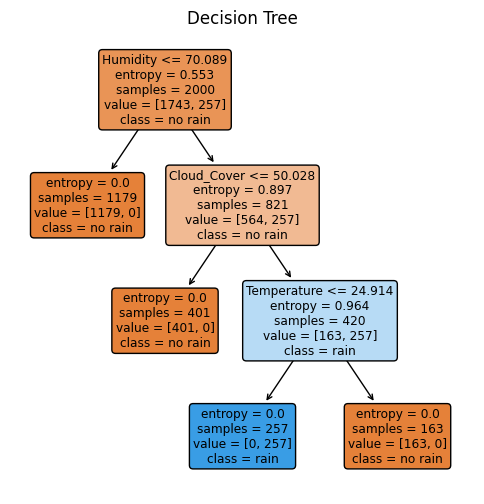

In [43]:
#plot decision tree
fig, ax = plt.subplots(figsize=(6, 6)) #figsize value changes the size of plot
tree.plot_tree(clf,filled=True, rounded = True,  class_names = classes, ax=ax,feature_names=['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'])
# y.unique().tolist()
plt.title("Decision Tree")
plt.show()

At the root node, we have *Humidity* feature which has an entropy of 0.55 implying impurity in the node. Then, the next decision node is *Cloud Cover* and after that is *Temperture*. The last leaf nodes are reached when entropy is 0. According to this diagram, the weather conditions to get rain are *Humidity* above 70.089, *Cloud Cover* above 50.028 and *Temperature* below 24.914.  In this case, *Wind Speed* and *Pressure* does not have a significant contribution to the classification. 

In [44]:
# Evaluation of the classification

clf_classification = classification_report(y_testset, y_pred_clf)
print(clf_classification)

# Area under ROC curve
rocauc_clf = roc_auc_score(y_testset, y_pred_clf)
print(f'Area Under Curve for Weighted Logistic Regression: {rocauc_clf:.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Area Under Curve for Weighted Logistic Regression: 1.00


In [45]:
# perform k-fold CV
scores = cross_val_score(clf, X, y, cv=10)

print('Cross-validation scores:', scores)
print('Average cross-validation score:', scores.mean())

Cross-validation scores: [1.    1.    1.    1.    1.    1.    1.    0.996 1.    1.   ]
Average cross-validation score: 0.9996


## 7) Random Forest

In [46]:
# Specify the model
rf_model = RandomForestClassifier(random_state = 42)

# Fit iowa_model with the training data.
rf_model.fit(X_trainset, y_trainset)

RandomForestClassifier(random_state=42)

In [47]:
# prediction of the rf model
predictions =rf_model.predict(X_testset)
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(y_testset, predictions)


In [48]:
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.002


In [49]:
# Evaluation of the classification

rf_classification = classification_report(y_testset, predictions)
print(rf_classification)

# Area under ROC curve
rocauc_rf = roc_auc_score(y_testset, predictions)
print(f'Area Under Curve for Weighted Logistic Regression: {rocauc_rf:.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500

Area Under Curve for Weighted Logistic Regression: 0.99


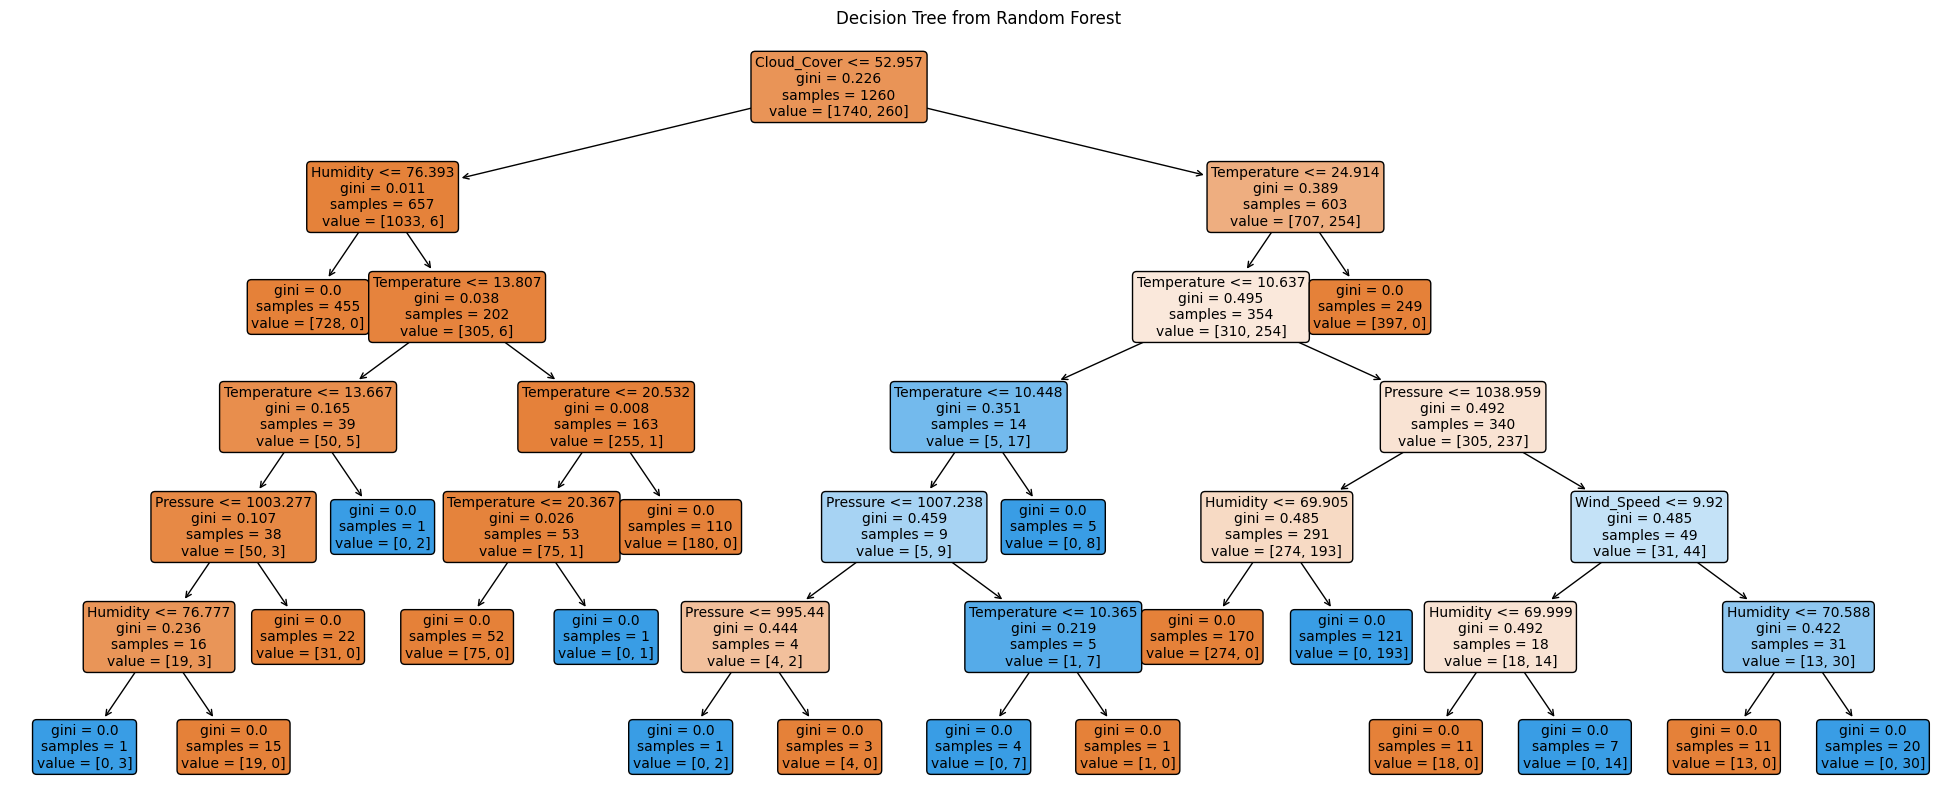

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Pick one of the tree from the forest, 
tree_to_plot = rf_model.estimators_[2] # index 2

# Plot the decision tree
fig, ax = plt.subplots(figsize=(25, 10)) #figsize value changes the size of plot

plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [51]:
param_dist = {'n_estimators': randint(5,15),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_trainset, y_trainset)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d0d00a94190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d0d00bd7b80>})

In [52]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 12}


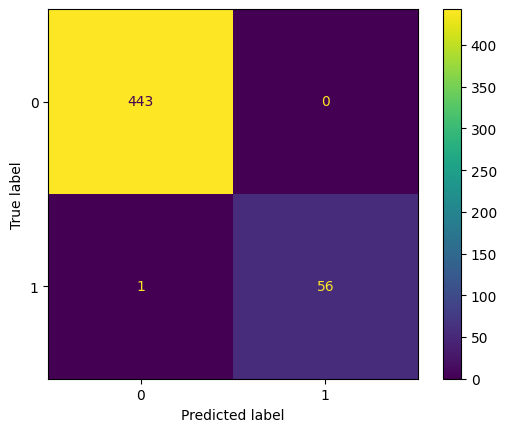

In [53]:
# Generate predictions with the best model
y_pred_set = best_rf.predict(X_testset)

# Create the confusion matrix
cm_rf = confusion_matrix(y_testset, y_pred_set)

ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot();

In [54]:
# Evaluation of the classification

rf_classification = classification_report(y_testset, y_pred_set)
print(rf_classification)

# Area under ROC curve
rocauc_rf = roc_auc_score(y_testset,y_pred_set)
print(f'Area Under Curve for Weighted Logistic Regression: {rocauc_rf:.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500

Area Under Curve for Weighted Logistic Regression: 0.99


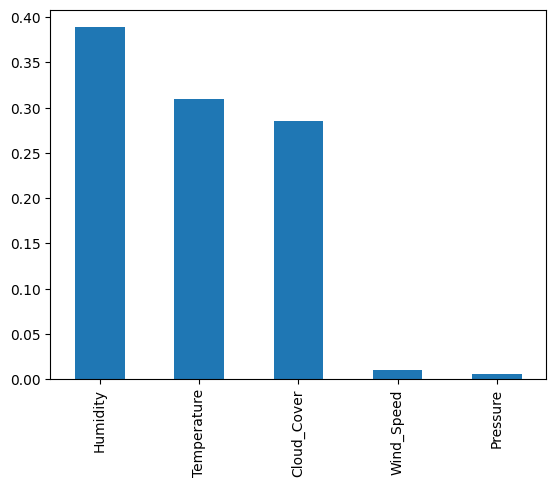

In [55]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_trainset.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## 7) Conclusions:

* The  Weighted Logistic Regression seems to be a better model than the Standard Logistic regression for this slightly  imbalanced dataset since it  improves the true positives increasing  recall and the ROC curve.
* The most influential variables  in the  Logistic Regression and Random Forest  are *Humidity*, *Cloud Cover* and *Temperature*.
 * The contribution of  *Wind Speed* and *Pressure* is almost null in  Logistic Regression and Random Forest algorithms, this can be understood from the scatter plots. Since these variables have nearly the same range of values in both classes is it difficult to distinguish the two variables. On the other hand, *Humidity*, *Cloud Cover*, and *Temperature* have  a very well-differentiated  range of values in each class. 
 * The fact that *Temperature*  acts in the opposite direction as  *Humidity* and *Cloud Cover*  in the Logistic Regression can be understood in the Decision Tree diagram: the weather conditions  for rain predictions are Humidity above 70.089, Cloud Cover above 50.028, and Temperature below 24.914.
 * The Weighted Logistic Regression, Decision Tree and Random Forest are doing well in predicting and classify the positive output *rain*. 


## 8) References
1. [IBM](https://www.coursera.org/learn/machine-learning-with-python)
2. [Google_ML](https://developers.google.com/machine-learning)
3. [Medium_Decision_Tree](https://medium.com/@sunils0506/decision-tree-types-metrics-dc9b97150f8d)
4. [Cross_Val](https://datasciencehorizons.com/understanding-cross-validation-scikit-learn-practical-guide/?utm_source=rss&utm_medium=rss&utm_campaign=understanding-cross-validation-scikit-learn-practical-guide)
5. [Random_Forest_Kaggle](https://www.kaggle.com/code/dansbecker/random-forests)
6. [Random_Forest_DataCamp](https://www.datacamp.com/tutorial/random-forests-classifier-python)
7. StackExchange 